In [0]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
%matplotlib inline

In [0]:
data=mnist.load_data()

In [0]:
dir(data)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [0]:
len(data[0][1])

60000

In [0]:
(x_train,y_train),(x_test,y_test)=data

In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
y_train.shape[0]

60000

In [0]:
assert(x_train.shape[0]==y_train.shape[0]),"The number of images is not equal"
assert(x_train.shape[1:]==(28,28)),"The dimensions of the images are not 28*28"
assert(x_test.shape[0]==y_test.shape[0]),"The number of images is not equal"
assert(x_test.shape[1:]==(28,28)),"The dimensions of the images are not 28*28"

In [0]:
num_of_samples=[]
cols=5
num_classes=10

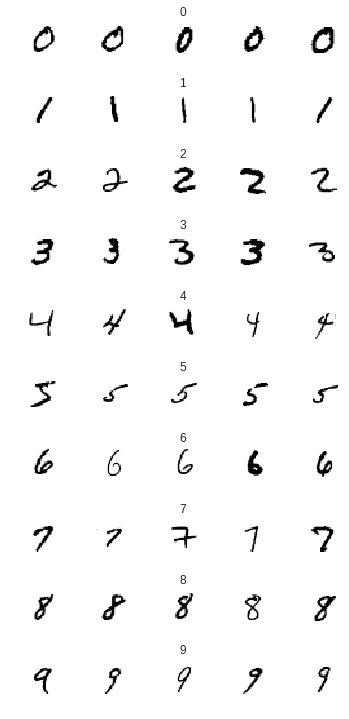

In [0]:
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    #print(len(x_selected))
    axs[j][i].imshow(x_selected[i,:,:])
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

    

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
sd=x_train[y_train==0]

In [0]:
sd[0].shape

(28, 28)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

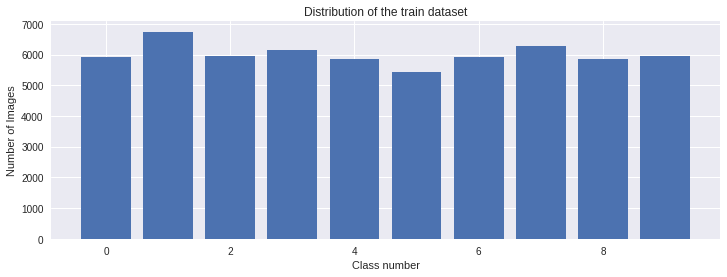

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)   # image is converted into 3d


In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10) # changing into categorical encoding 0--> 1 0 0 0 0 0 0 0 0   1 -->0 1 0 0 0 0 0 0 0 0

In [0]:
x_train=x_train/255 # to performe with more computation power
x_test=x_test/255

In [0]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dropout(0.3))#if you plot graph and you see that your accuracy or loss is not upto that mark then change dropout
  model.add(Dense(num_classes,activation='softmax')) #num_classes =10 it means jo result aayega vo 0-9 ke beech mein aayega . agar result mein yes or no aata to hum num_classes ko 2 kar dete
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy']) # lr = learning rate
  return model
  

In [0]:
lenet =le_net()

In [0]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [0]:
history=lenet.fit(x_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.2330 - acc: 0.9260 - val_loss: 0.0544 - val_acc: 0.9843
Epoch 2/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0810 - acc: 0.9755 - val_loss: 0.0416 - val_acc: 0.9880
Epoch 3/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0687 - acc: 0.9797 - val_loss: 0.0378 - val_acc: 0.9883
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0624 - acc: 0.9813 - val_loss: 0.0370 - val_acc: 0.9895
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0592 - acc: 0.9832 - val_loss: 0.0373 - val_acc: 0.9895
Epoch 6/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0547 - acc: 0.9839 - val_loss: 0.0369 - val_acc: 0.9888
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0516 - acc: 0.9843 - val_loss: 0.0379 - val_acc:

Text(0.5, 0, 'epoch')

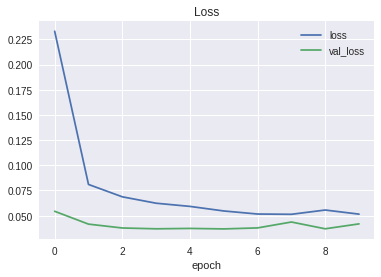

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
#blue line should not go beyond green line and blue line should be above green line if this is not the case then overfitting problem is there

Text(0.5, 0, 'epoch')

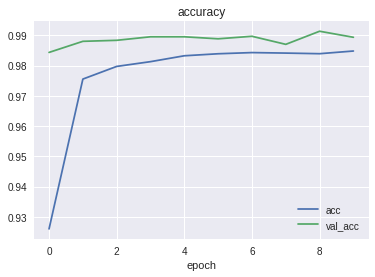

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')
#green line should be above blue line 


In [0]:
import requests
from PIL import Image
from io import BytesIO

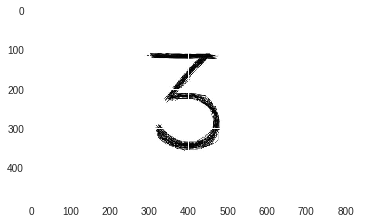

In [0]:
url="https://ak3.picdn.net/shutterstock/videos/23708593/thumb/1.jpg"
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

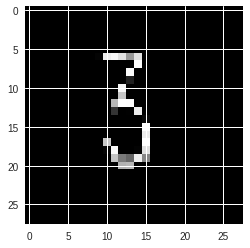

In [0]:
import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(28,28))
gray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [0]:
#img_array=cv2.resize(img_array,(28,28))

In [0]:
image=image/255
image=image.reshape(1,28,28,1)

In [0]:
lenet.predict_classes(image)

array([3])